In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('merged.csv')

C:\Users\ronal\AppData\Local\Temp\ipykernel_8284\1639747921.py:1: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged.csv')


In [3]:
df.shape

(1123589, 34)

# First Sweetviz

Change State_FIPS and Zip5 to str to run Sweetviz

df['State_FIPS'] = df['State_FIPS'].astype(str)
df['Zip5'] = df['Zip5'].astype(str)

%%time
report = sv.analyze(df, target_feat='eligibility')
report.show_html('EDA_Report.html')

In [4]:
df['eligibility'].value_counts()

0    1114151
1       9438
Name: eligibility, dtype: int64

In [5]:
df.eligibility.value_counts(normalize=True).mul(100).round(2)

0    99.16
1     0.84
Name: eligibility, dtype: float64

In [6]:
df.shape

(1123589, 34)

In [7]:
df.dtypes

NPI                     int64
Last_Org_Name          object
First_Name             object
MI                     object
Crdntls                object
Gndr                   object
Ent_Cd                 object
St1                    object
St2                    object
City                   object
State_Abrvtn           object
State_FIPS             object
Zip5                   object
RUCA                  float64
RUCA_Desc              object
Cntry                  object
Type                   object
Mdcr_Prtcptg_Ind       object
HCPCS_Cd               object
HCPCS_Desc             object
HCPCS_Drug_Ind         object
Place_Of_Srvc          object
Tot_Benes               int64
Tot_Srvcs             float64
Tot_Bene_Day_Srvcs      int64
Avg_Sbmtd_Chrg        float64
Avg_Mdcr_Alowd_Amt    float64
Avg_Mdcr_Pymt_Amt     float64
Avg_Mdcr_Stdzd_Amt    float64
fraud                   int64
partb_n                 int64
EXCLTYPE               object
EXCLDATE              float64
eligibilit

In [8]:
df.shape

(1123589, 34)

## Removing null values

In [9]:
df.isna().sum()

NPI                         0
Last_Org_Name               0
First_Name              64187
MI                     405734
Crdntls                139077
Gndr                    64187
Ent_Cd                      0
St1                         0
St2                    839121
City                        0
State_Abrvtn                0
State_FIPS                  0
Zip5                        1
RUCA                      703
RUCA_Desc                 703
Cntry                       0
Type                        0
Mdcr_Prtcptg_Ind            0
HCPCS_Cd                    0
HCPCS_Desc                  0
HCPCS_Drug_Ind              0
Place_Of_Srvc               0
Tot_Benes                   0
Tot_Srvcs                   0
Tot_Bene_Day_Srvcs          0
Avg_Sbmtd_Chrg              0
Avg_Mdcr_Alowd_Amt          0
Avg_Mdcr_Pymt_Amt           0
Avg_Mdcr_Stdzd_Amt          0
fraud                       0
partb_n                     0
EXCLTYPE              1123480
EXCLDATE              1123480
eligibilit

### Gender

In [10]:
df[df.Gndr.isna()].head()

,NPI,Last_Org_Name,First_Name,MI,Crdntls,Gndr,Ent_Cd,St1,St2,City,State_Abrvtn,State_FIPS,Zip5,RUCA,RUCA_Desc,Cntry,Type,Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,fraud,partb_n,EXCLTYPE,EXCLDATE,eligibility
19,1003001322,Nodaway County Health Center,NaN,NaN,NaN,NaN,O,515 N Main St,NaN,Maryville,MO,29,64468,4.0,Micropolitan area core: primary flow within an...,US,Mass Immunizer Roster Biller,Y,"90662, G0008",Vaccine for influenza for injection into muscl...,"Y, N",O,259,259.0,259,51.756757,39.676757,39.676757,39.717297,0,0,NaN,NaN,0
32,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,TN,47,37615,1.0,Metropolitan area core: primary flow within an...,US,Centralized Flu,Y,"0001A, 0002A, 0011A, 0012A, 0013A, 0064A, 9066...","Adm sarscov2 30mcg/0.3ml 1st, Adm sarscov2 30m...","N, Y",O,996,996.0,996,69.103574,36.739719,36.739719,38.283042,0,0,NaN,NaN,0
58,1003004904,Texas Road Old Bridge Llc,NaN,NaN,NaN,NaN,O,1183 Englishtown Rd,NaN,Old Bridge,NJ,34,8857,1.0,Metropolitan area core: primary flow within an...,US,Pharmacy,Y,"0011A, 0012A, 0013A, 0031A","Adm sarscov2 100mcg/0.5ml1st, Adm sarscov2 100...",N,O,106,111.0,111,55.181712,43.652072,43.652072,39.200000,0,0,NaN,NaN,0
59,1003004938,"Cvs State Capital, L.L.C.",NaN,NaN,NaN,NaN,O,446 Sabattus St,NaN,Lewiston,ME,23,4240,1.0,Metropolitan area core: primary flow within an...,US,Mass Immunizer Roster Biller,Y,"0001A, 0002A, 0003A, 0004A, 0031A, 90662, 9068...","Adm sarscov2 30mcg/0.3ml 1st, Adm sarscov2 30m...","N, Y",O,867,867.0,867,46.380069,37.812364,37.812364,39.300992,0,0,NaN,NaN,0
60,1003005059,Torrington Area Health District,NaN,NaN,NaN,NaN,O,350 Main St Ste A,NaN,Torrington,CT,09,6790,4.0,Micropolitan area core: primary flow within an...,US,Mass Immunizer Roster Biller,Y,"0011A, 0031A, 0064A, 90662, G0008","Adm sarscov2 100mcg/0.5ml1st, Adm sarscov2 vac...","N, Y",O,1372,1946.0,1946,27.950797,26.658335,26.658335,27.733289,0,0,NaN,NaN,0


In [11]:
len(df[(df.Gndr.isna()) & (df.Ent_Cd == 'O')])

64187

All null values for gender are related to Organization. 

In [12]:
df.loc[df['Ent_Cd'] == 'O', ['Crdntls', 'Gndr']] = 'O'

### Credentials

In [13]:
df[(~df.Crdntls.notna()) & (df.Ent_Cd != 'O')].shape[0]

74890

In [14]:
df[(~df.Crdntls.notna()) & (df.Ent_Cd == 'I')].shape[0]

74890

All blanks remaining Crdntls blanks are Individuals

In [15]:
df.Crdntls.fillna('I', inplace = True)

### RUCA

In [16]:
df[(~df.RUCA.notna())]

,NPI,Last_Org_Name,First_Name,MI,Crdntls,Gndr,Ent_Cd,St1,St2,City,State_Abrvtn,State_FIPS,Zip5,RUCA,RUCA_Desc,Cntry,Type,Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,fraud,partb_n,EXCLTYPE,EXCLDATE,eligibility
256,1003015652,Dehqanzada,Zia,A,M.D.,M,I,Cmr 442,Box 291,Apo,AE,9B,9042,NaN,NaN,US,General Surgery,Y,"47562, 47563, 99222, 99223, 99231, 99232","Removal of gallbladder using an endoscope, Rem...",N,F,294,334.0,334,400.910180,162.246347,128.874162,122.291257,0,0,NaN,NaN,0
10669,1003962614,Friedman,Kevin,NaN,MD,M,I,University Of Colorado School Of Medicine,NaN,Denver,CO,8,80262,NaN,NaN,US,Pediatric Medicine,Y,"93303, 93320, 93325",Ultrasound examination of congenital heart def...,N,F,46,49.0,49,200.673469,29.826122,20.886939,18.730204,0,0,NaN,NaN,0
10748,1003967290,Patel,Paresh,R,MD,M,I,Walter Reed Army Medical Ctr,6900 Georgia Ave,Washington,DC,11,20307,NaN,NaN,US,Emergency Medicine,Y,"93010, 99285, 99291",Routine electrocardiogram (ekg) using at least...,N,F,119,122.0,120,1172.974603,122.846833,102.297522,98.511289,0,0,NaN,NaN,0
11899,1013025915,Lee,Yong,L,MD,M,I,"888 Tianlin Lu, Building 1e,",NaN,Shanghai,ZZ,9E,20023,NaN,NaN,CN,Family Practice,Y,"20610, 90686, 90694, 90732, 99203, 99213, 9921...",Aspiration and/or injection of large joint or ...,"N, Y",O,471,659.0,569,217.179491,89.491857,59.565353,54.661231,0,0,NaN,NaN,0
12195,1013049014,Mcfarland,Timothy,G,DC,M,I,43553 W Askew Dr,NaN,Maricopa,AZ,04,85238,NaN,NaN,US,Chiropractic,Y,98941,"Chiropractic manipulative treatment, 3 to 4 sp...",N,O,25,388.0,388,50.000000,39.670000,28.121392,28.210928,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112750,1992035307,Tarrillion,Zach,A,D.P.T,M,I,Psc 482,Box 3052,Fpo,AP,9C,96362,NaN,NaN,US,Physical Therapist in Private Practice,Y,97110,"Therapeutic exercise to develop strength, endu...",N,O,12,64.0,43,50.000000,29.023750,22.903281,20.604063,0,0,NaN,NaN,0
1115074,1992191613,Hullett,Patrick,NaN,M.D.,M,I,505 Parnassus Avenue,NaN,San Francisco,CA,6,93143,NaN,NaN,US,Neurology,Y,95718,Continuous measurement of brain wave activity ...,N,F,12,16.0,16,706.000000,151.870000,121.500000,106.150000,0,0,NaN,NaN,0
1115155,1992197222,Langford,Shanna,NaN,I,F,I,222 Medical Circle,St Claire Regional Medical Center,Morehead,KY,21,40531,NaN,NaN,US,Physician Assistant,Y,"80053, 80061, 81003, 82306, 82607, 83036, 8444...","Blood test, comprehensive group of blood chemi...","N, Y",O,489,802.0,623,68.223027,42.374302,27.093775,28.989942,0,0,NaN,NaN,0
1117774,1992726616,Pham,John,D,DC,M,I,20928 N John Wayne Pkwy,Suite C-4,Maricopa,AZ,4,85239,NaN,NaN,US,Chiropractic,Y,98941,"Chiropractic manipulative treatment, 3 to 4 sp...",N,O,122,852.0,852,66.607981,39.670000,26.348908,26.482171,0,0,NaN,NaN,0


In [17]:
df.RUCA.fillna(0, inplace = True)

# Chi

In [18]:
df.isna().sum()

NPI                         0
Last_Org_Name               0
First_Name              64187
MI                     405734
Crdntls                     0
Gndr                        0
Ent_Cd                      0
St1                         0
St2                    839121
City                        0
State_Abrvtn                0
State_FIPS                  0
Zip5                        1
RUCA                        0
RUCA_Desc                 703
Cntry                       0
Type                        0
Mdcr_Prtcptg_Ind            0
HCPCS_Cd                    0
HCPCS_Desc                  0
HCPCS_Drug_Ind              0
Place_Of_Srvc               0
Tot_Benes                   0
Tot_Srvcs                   0
Tot_Bene_Day_Srvcs          0
Avg_Sbmtd_Chrg              0
Avg_Mdcr_Alowd_Amt          0
Avg_Mdcr_Pymt_Amt           0
Avg_Mdcr_Stdzd_Amt          0
fraud                       0
partb_n                     0
EXCLTYPE              1123480
EXCLDATE              1123480
eligibilit

In [19]:
df = df.drop(['Last_Org_Name', 'First_Name', 'MI', 'St1', 'St2','City', 'State_FIPS', 'Zip5', 'RUCA_Desc','Cntry', 'HCPCS_Desc', 'fraud', 'partb_n', 'EXCLTYPE','EXCLDATE'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123589 entries, 0 to 1123588
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NPI                 1123589 non-null  int64  
 1   Crdntls             1123589 non-null  object 
 2   Gndr                1123589 non-null  object 
 3   Ent_Cd              1123589 non-null  object 
 4   State_Abrvtn        1123589 non-null  object 
 5   RUCA                1123589 non-null  float64
 6   Type                1123589 non-null  object 
 7   Mdcr_Prtcptg_Ind    1123589 non-null  object 
 8   HCPCS_Cd            1123589 non-null  object 
 9   HCPCS_Drug_Ind      1123589 non-null  object 
 10  Place_Of_Srvc       1123589 non-null  object 
 11  Tot_Benes           1123589 non-null  int64  
 12  Tot_Srvcs           1123589 non-null  float64
 13  Tot_Bene_Day_Srvcs  1123589 non-null  int64  
 14  Avg_Sbmtd_Chrg      1123589 non-null  float64
 15  Avg_Mdcr_Alowd_

In [21]:
df.RUCA = df.RUCA.astype(object)

In [22]:
cat_col = ['Gndr', 'State_Abrvtn', 'RUCA','Type', 
    'Mdcr_Prtcptg_Ind', 'HCPCS_Drug_Ind', 'Place_Of_Srvc']

In [23]:
X = df[cat_col]
y = df.eligibility

In [24]:
X.describe()

,Gndr,State_Abrvtn,RUCA,Type,Mdcr_Prtcptg_Ind,HCPCS_Drug_Ind,Place_Of_Srvc
count,1123589,1123589,1123589.0,1123589,1123589,1123589,1123589
unique,3,61,23.0,103,4,4,4
top,M,CA,1.0,Nurse Practitioner,Y,N,O
freq,559187,87424,948304.0,149911,1122070,901567,561001


In [25]:
label_encoder = LabelEncoder()
for col in cat_col:  
    X[col] = label_encoder.fit_transform(X[col])


C:\Users\ronal\AppData\Local\Temp\ipykernel_8284\3563575316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


In [26]:
chi2(X, y)

(array([7.47817427e+01, 1.04697243e+02, 2.34077516e+01, 1.80620680e+03,
        8.80715104e-03, 1.69115690e+01, 1.44343798e+02]),
 array([5.25736478e-18, 1.42298891e-24, 1.31049394e-06, 0.00000000e+00,
        9.25231154e-01, 3.91621725e-05, 2.98830725e-33]))

In [27]:
X.head()

,Gndr,State_Abrvtn,RUCA,Type,Mdcr_Prtcptg_Ind,HCPCS_Drug_Ind,Place_Of_Srvc
0,1,25,1,44,2,0,3
1,1,19,1,73,2,0,0
2,1,41,1,7,2,1,1
3,0,41,1,63,2,0,2
4,1,9,1,30,2,0,0


In [28]:
chi2_stats, p_values = chi2(X, y)

results_df = pd.DataFrame({'Feature': cat_col, 'Chi-squared': chi2_stats, 'p-value': p_values})

print(results_df)

            Feature  Chi-squared       p-value
0              Gndr    74.781743  5.257365e-18
1      State_Abrvtn   104.697243  1.422989e-24
2              RUCA    23.407752  1.310494e-06
3              Type  1806.206803  0.000000e+00
4  Mdcr_Prtcptg_Ind     0.008807  9.252312e-01
5    HCPCS_Drug_Ind    16.911569  3.916217e-05
6     Place_Of_Srvc   144.343798  2.988307e-33


In [29]:
X_new = SelectKBest(score_func=chi2, k=5).fit_transform(X, y)

In [30]:
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Gndr', 'State_Abrvtn', 'RUCA', 'Type', 'Place_Of_Srvc'], dtype='object')


# Multicollinearity

In [31]:
categorical_columns = ['Gndr', 'State_Abrvtn', 'RUCA', 'Type', 'Place_Of_Srvc']

numerical_columns = ['Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg',
    'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt']

target = ['eligibility']

In [32]:
data_num = df[numerical_columns+target]

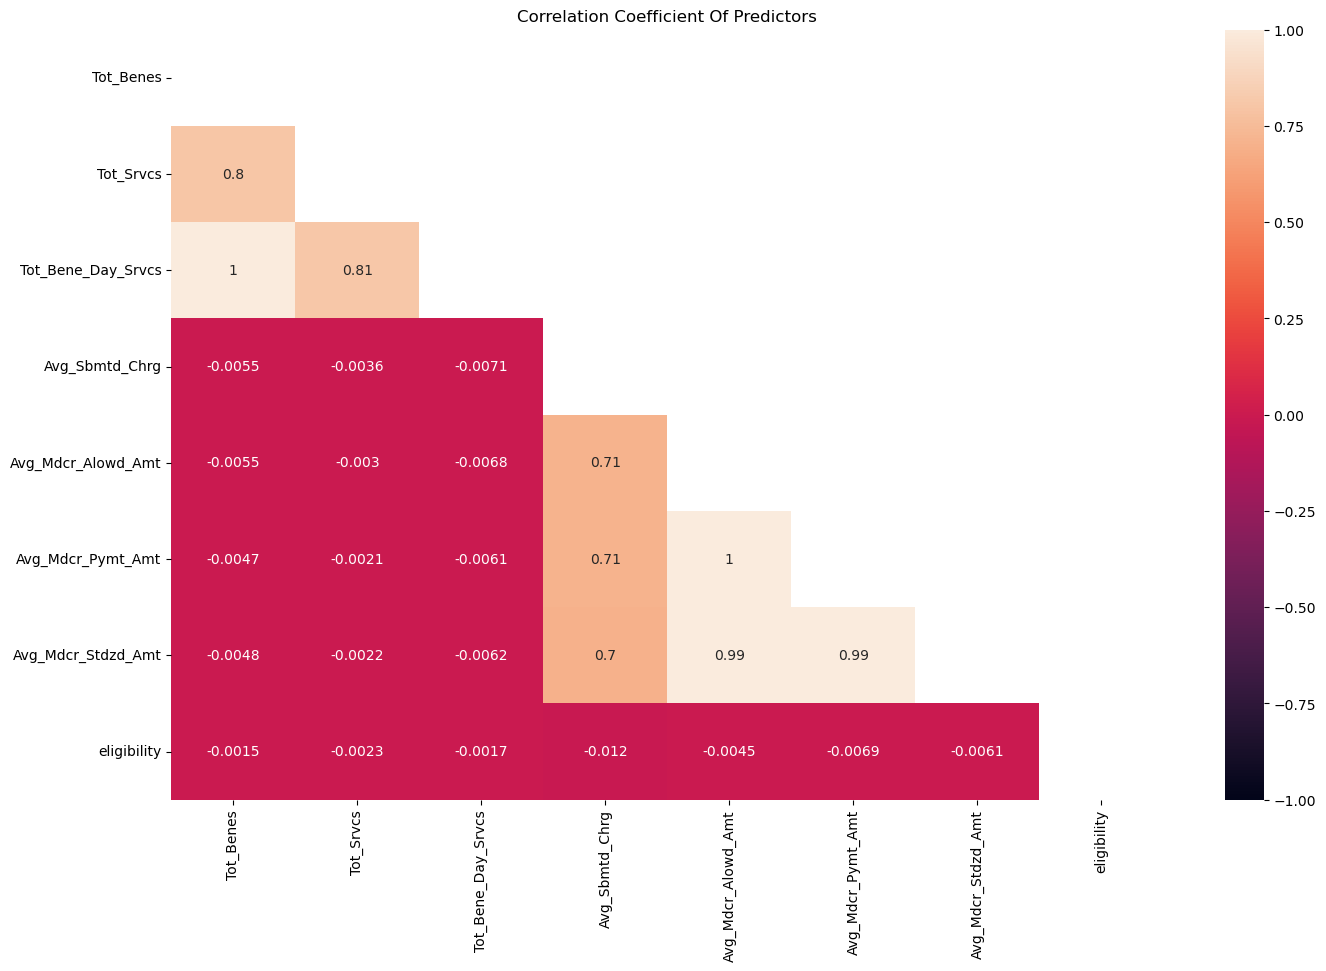

In [33]:
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(data_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [34]:
X = data_num.drop(columns=['eligibility'])  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Tot_Benes,113.262414
1,Tot_Srvcs,2.917203
2,Tot_Bene_Day_Srvcs,118.574227
3,Avg_Sbmtd_Chrg,2.378833
4,Avg_Mdcr_Alowd_Amt,348.941866
5,Avg_Mdcr_Pymt_Amt,447.212086
6,Avg_Mdcr_Stdzd_Amt,122.835942


In [35]:
X = data_num.drop(columns=['eligibility','Tot_Benes'])  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Tot_Srvcs,2.877186
1,Tot_Bene_Day_Srvcs,2.875452
2,Avg_Sbmtd_Chrg,2.378559
3,Avg_Mdcr_Alowd_Amt,348.884253
4,Avg_Mdcr_Pymt_Amt,447.167189
5,Avg_Mdcr_Stdzd_Amt,122.835703


In [36]:
X = data_num.drop(columns=['eligibility','Tot_Benes','Avg_Mdcr_Alowd_Amt'])  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Tot_Srvcs,2.877133
1,Tot_Bene_Day_Srvcs,2.875426
2,Avg_Sbmtd_Chrg,2.378053
3,Avg_Mdcr_Pymt_Amt,124.709450
4,Avg_Mdcr_Stdzd_Amt,122.325425


In [37]:
X = data_num.drop(columns=['eligibility','Tot_Benes', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt'])  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Tot_Srvcs,2.877124
1,Tot_Bene_Day_Srvcs,2.875426
2,Avg_Sbmtd_Chrg,2.329053
3,Avg_Mdcr_Stdzd_Amt,2.330288


# STANDARDIZATION

In [38]:
numerical_columns = ['Tot_Bene_Day_Srvcs', 'Tot_Srvcs','Avg_Sbmtd_Chrg', 'Avg_Mdcr_Stdzd_Amt']

In [39]:
data_num[numerical_columns] = StandardScaler().fit_transform(data_num[numerical_columns])

C:\Users\ronal\AppData\Local\Temp\ipykernel_8284\1048143428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[numerical_columns] = StandardScaler().fit_transform(data_num[numerical_columns])


# Label Encoding

In [40]:
df_label = df.copy()

In [41]:
label_encoder = LabelEncoder()
for col in categorical_columns:  
    df_label[col] = label_encoder.fit_transform(df[col])

In [42]:
df_label[numerical_columns] = StandardScaler().fit_transform(df_label[numerical_columns])

In [43]:
df_label = df_label[categorical_columns+numerical_columns+target]

In [44]:
df_label.shape

(1123589, 10)

In [45]:
df_label.head()

,Gndr,State_Abrvtn,RUCA,Type,Place_Of_Srvc,Tot_Bene_Day_Srvcs,Tot_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Stdzd_Amt,eligibility
0,1,25,1,44,3,0.086846,0.038814,-0.270365,-0.180985,0
1,1,19,1,73,0,0.138674,0.135430,-0.241973,-0.414999,0
2,1,41,1,7,1,-0.013540,-0.031064,-0.223454,0.001080,0
3,0,41,1,63,2,-0.039419,-0.057107,-0.377797,-0.360670,0
4,1,9,1,30,0,-0.039454,-0.057134,-0.151161,-0.226828,0


In [46]:
df_label.to_csv('label.csv', index = False)

## One-hot encoding

In [47]:
df_reduced = df[categorical_columns+numerical_columns+target]

In [48]:
df_reduced.shape

(1123589, 10)

In [49]:
encoder = OneHotEncoder(sparse = False)

In [50]:
encoder.fit(df_reduced[categorical_columns])
df_reduced_encoded = encoder.transform(df_reduced[categorical_columns])
df_reduced_encoded_df = pd.DataFrame(df_reduced_encoded, columns=encoder.get_feature_names(categorical_columns))
df_reduced_encoded_df.index = df_reduced.index

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
df_reduced_encoded_df.shape

(1123589, 194)

In [52]:
df_combined = df_reduced_encoded_df.join(data_num)

In [53]:
df_combined = df_combined.drop(columns=['Tot_Benes', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt'])

In [54]:
df_combined.shape

(1123589, 199)

In [64]:
df_combined = df[['NPI']].join(df_combined)

In [65]:
df_combined.to_csv('onehot.csv', index = False)